# LFY032

## Föreläsning 1 -  Python repetition (och lite nytt...)

Fredrik Skärberg, 2024


### Dagens agenda

* Python repetition - datatyper, funktionalitet, moduler etc.
* Kort om biblioteken `matplotlib`, `numpy` och `pandas`
* Introduktion till att analysera data: 1-2 Dataset (Valresultatsdata och Matkostnadsdata)
* Genomgång av Laboration 1
* Ett kort quiz på mentimeter (i mån om tid)
    * Gå till www.menti.com och skriv in koden: 8663 5295 
* Frågor

# Python version
I kursen använder vi Python 3.6

![Python logo](../images/python-logo.png)

# Python tidslinje

* **1989-1991**: Guido van Rossum började utveckla Python som ett hobbyprojekt.

* **1991**: Den första versionen av Python, version 0.9.0, släpptes i februari.

* **1994**: Python 1.0, den första officiella versionen, släpptes.

* **2000-2008**: Python genomgick förbättringar och uppdateringar inom Python 2.x-serien, vilket ledde till ökad användning.

* **2008**: Python 3.0 släpptes med betydande brytande förändringar för att göra språket renare och mer konsistent.

* **Nuvarande**: Python är ett av de mest använda programmeringsspråken i världen, används i en mängd olika områden och har en aktiv användargrupp och ett stort ekosystem av tredjepartsbibliotek och ramverk.

# Ett Python program

(behöver inte förstå allt som händer här än...)

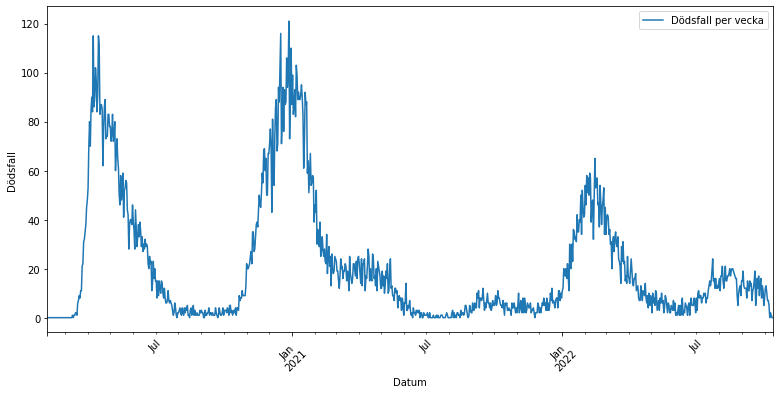

In [2]:
import urllib
import pandas

# Ladda hem data från European Centre for Disease Prevention
data = urllib.request.urlopen("https://opendata.ecdc.europa.eu/covid19/nationalcasedeath_eueea_daily_ei/csv/data.csv")
df = pandas.read_csv(data)

# Konvertera datum från sträng till datetime
df["date"] = pandas.to_datetime(df["dateRep"], dayfirst=True)

# Plocka ut Sverige samt ta bort de två sista veckorna
sweden = df[df["countriesAndTerritories"]=="Sweden"][:-2].copy()

# Rita graf
plot = sweden.plot(x="date", y="deaths", rot=45, figsize=(13,6))
plot.set_ylabel("Dödsfall")
plot.set_xlabel("Datum")
plot.legend(["Dödsfall per vecka"])

# Jupyter

Vi kommer arbeta mycket med ett verktyg som heter [Jupyter](https://jupyter.org/). Denna föreläsning är en s.k. Jupyter notebook och många av uppgifterna kommer också göras i Jupyter.

I en Jupyter notebook så går det att skriva Pythonkod som sedan kan köras direkt (genom att trycka **Shift+Enter**). 
Varje cell i en notebook kan ändras och köras om. 
Alla exempel under föreläsningen är kod som körs på detta sättet och ni kommer själva skriva kod här under laborationerna.

### Python i Jupyter
Python backend och Jupyter för att enkelt skriva kod och visualisera variabler m.m.

* Varje cell kan innehålla många satser (läs: många rader kod)
* Om den sista satsen är ett värde visas det på skärmen
* Alla variabler "sparas" så länge kerneln är igång

In [6]:
x = 5
y = 10
z = x + y
y

10

In [7]:
#Men variablerna finns sparade 
print(x)
print(y)


5
10


## Datatyper

* Sträng (string, `str`): ```"Östan om sol och västan om måne"```
* Tal
    * Heltal (integer, `int`): ```42, -2, ...```
    * Flyttal (`float`): ```3.14159, -1.0```
    * Komplexa tal (`complex`): ```2 + 3J```
* [Listor](https://docs.python.org/3/tutorial/datastructures.html#more-on-lists) (`list`): ```[1, 1, 2, 3, 5, 8]```
* [Tupler](https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences) (`tuple`): ```(1, "Hej", 0.1)``` 
* [Dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) (`dict`): ```{ "nyckel1": 5, "nyckel2": "värde2" }``` 
* Boolean (`bool`): ```True, False```
* NoneType (`None`): ```None```
* Objekt (`object`): Senare...(kopplat till klasser)

För att kolla typen av en variabel kan man använda keyword "type"

In [10]:
type(1)

int

## Aritmetik
För att göra beräkningar med de olika taltyperna används de "vanliga" operatorerna i textformat:

In [18]:
# Addition, subtraktion, multiplikation, division, komplexa tal, heltalsdivision osv.
10//3

3

## Kommentarer

För att förhindra att en rad tolkas som kod, eller för att lägga till en kommentar, så kan `#` användas.

In [19]:
# Skapa en lista
lista = ["a", 2] # Allt efter en brädgård på en rad körs inte av Python-tolken

#En kommentar
i=5
print(f"Här printar jag {i}") #Här printar jag



Här printar jag 5


även strängar (samt fler-rads-strängar) kan fungera som kommentarer

In [21]:
"En sträng"

"""
En sträng
över
flera
rader
"""

'\nEn sträng\növer\nflera\nrader\n'

## Tupler
En samling objekt (kan vara olika typer) där antal element inte kan ändras.

Användbart när vi vill lagra flera egenskaper tillsammans. 

T.ex en vara och dess pris:

In [22]:
sak = ("Bröd", 15)


In [23]:
sak[0]


'Bröd'

In [24]:
sak[1]


15

Hur gör vi en tupel med ett element?

In [28]:
ett_element = ("Hej",)
ett_element


('Hej',)

Notera att detta är väldigt likt följande:

In [27]:
en_str = ("Hej")
en_str


'Hej'

## Tupel uppackning (unpacking, destructuring)

Vi kan plocka ut delarna ur en tupel med s.k. "uppackning"

In [32]:
a, b = ("Element ett", "Element två")
a


'Element ett'

Om vi inte bryr oss om ett element så kan vi slänga det med `_`

In [34]:
a, _ = ("Element ett", "Element två")
a


'Element ett'

## Exempel: `enumerate`

En användbar inbyggd funktion är `enumerate(list)` som tar en lista som argument och lämnar tillbaka en ny lista (*list-likt objekt) med tupler där varje element i indatan har parats ihop med sitt index.

In [36]:
list(enumerate(["a", "b", "c"]))


[(0, 'a'), (1, 'b'), (2, 'c')]

När vi loopar över detta resultat så kan det vara användbart att direkt packa upp tuplerna!

In [39]:
for idx, letter in enumerate(["a", "b", "c"]):
    print(idx, letter)
    
    

0 a
1 b
2 c


## Listor
En samling objekt (kan vara olika typer) där antalet element kan ändras.

In [41]:
# Skapa en tom lista
lista = []
# Lägg till element
lista.append(5)
lista.append("test")
lista


[5, 'test']

In [43]:
#Vanligt att använda append i en loop, här t ex. 
lista = []

for j in range(10):
    
    #Gör något med j...
    j_tmp = j**3 + (j - 3*j)**2
    lista.append(j_tmp)
    
lista


[0, 5, 24, 63, 128, 225, 360, 539, 768, 1053]

In [46]:
lista1 = [1, 2, 3]
lista1 = lista1 + [4] #Addera två listor tillsammans
lista1 = lista1 + ['a']
lista1


[1, 2, 3, 4, 'a']

In [47]:
lista1 = ["Hej", 33, 'A']
print(lista1)

lista2 = [1, 2, 3, 'Okej']
print(lista2)


['Hej', 33, 'A']
[1, 2, 3, 'Okej']


In [48]:
ny_lista = lista1 + lista2
print(ny_lista)


['Hej', 33, 'A', 1, 2, 3, 'Okej']


### Indexering av listor

In [49]:
lista = ["A", "B", "C", "D"]
lista[0]


'A'

In [50]:
lista = ["A", "B", "C", "D"]
# Sista elementet
lista[-1]


'D'

In [53]:
lista = ["A", "B", "C", "D"]
# Från index 0 till (exkluderande) index 2
lista[0:3]


['A', 'B', 'C']

In [55]:
lista = ["A", "B", "C", "D"]
# Index 2 från slutet till och med sista
lista[-2:]


['C', 'D']

In [56]:
lista = ["A", "B", "C", "D"]
# Från index 0 till 3, hoppa 2 åt gången
lista[0:3:2]


['A', 'C']

# Loopar och listcomprehensions

## for loopar 

Ibland vill man gå igenom en lista eller objekt och göra en sak i taget. Då är For-loopar användbara.

In [58]:
lista = [1, 2, 3]

res = ""
for x in lista:
    res = res + str(x)
    
print(res)

123


In [60]:
# Konvertera lista av strängar till tal
lista = ["10", "15", "20", "50"]
tal = []

for element in lista:
    print("Konverterar ", element)
    tal.append(int(element))  
tal


Konverterar  10
Konverterar  15
Konverterar  20
Konverterar  50


[10, 15, 20, 50]

In [62]:
# Konvertera lista av strängar till tal med en s.k. listcomprehension
list_str = ["10", "15", "20", "50"]
tal = [int(x) for x in list_str]
tal


[10, 15, 20, 50]

$$
\left[ \underbrace{\mathrm{int}(x)}_{\text{värde som ska lagras}} \textbf{for} \underbrace{x}_{\text{loop variabel}} \textbf{in}\;\; \underbrace{\left[\text{"10", "15", "20", "50"}\right]}_{\text{lista som vi går igenom}} \right] = [10, 15, 20, 50]
$$

## Multipla listcomprehensions
Låt oss säga att vi har en lista av listor

In [63]:
lista_av_listor = [["A", "B"], ["C", "D"], ["E"]]


Hur kan vi "platta till" detta till bara en lista? Dvs transformera
```python
[["A", "B"], ["C", "D"], ["E"]]
```
till
```python
["A", "B", "C", "D", "E"]
```


In [65]:
enkel_lista = []
for lista in lista_av_listor:
    for sak in lista:
        enkel_lista.append(sak)
enkel_lista


['A', 'B', 'C', 'D', 'E']

In [67]:
[sak for lista in lista_av_listor for sak in lista]

['A', 'B', 'C', 'D', 'E']

## Kontrollstrukturer : if-satser 

Användbart då man vill jämföra variabler, eller köra kod som uppfyller ett speciellt kriterium


In [71]:
x = 5

if x > 8:
    print("Talet är större än 3")

En if-sats kan flera olika kriterier och den kan även innehålla det omvända

In [74]:
x = 100

if x > 3:
    print("Talet är större än 3")
elif x == 3:
    print("Talet är lika med 3")
else:
    print("Talet är mindre än 3")

Talet är större än 3


Vanliga matematiska kriterier för jämförelse är

* ```>``` större än
* ```>=``` större än eller lika med
* ```<``` mindre än
* ```<=``` mindre än eller lika med
* ```==``` lika med
* ```!=``` inte lika med

Alla dessa kan användas i python med syntaxen ovan.

Man kan jämföra olika tal med ´==´

In [75]:
#Jämföra två tal
a, b = 5, 5
if a==b:
    print(a)


5


In [78]:
#Jämföra två tal
a, b = 3, 5
if a==b:
    print(a)
    

In [82]:
if True:
    print('Detta är sant')
    
if False:
    print('Hit kommer vi inte')
    

Detta är sant


Man kan jämföra många saker genom att använda **and** och **or**

In [84]:
a, b, c, d = True, False, 3, 5


In [85]:
if a and c < d:
    print('a är sant och c är mindre än d')
    

a är sant och c är mindre än d


In [86]:
if a or b:
    print('a eller b är sant')

a eller b är sant


Man kan oxå "stapla" **if** satser genom att använda **elif** och **else**

In [92]:
num1 = 20

if num1<12:
    print(f"{num1} är bra")
elif num1>25:
    print(f"{num1} är bättre än bra")
elif num1>35:
    print(f"{num1} är ännu bättre")
else:
    print(f"{num1} är oklar")


20 är oklar


## While-loopar

Likt for-loopar, men med ett kriterie, dvs. loopa sålänge något är sant.

In [95]:
x=-5
while x < 3:
    print(x)
    x+=1
    

-5
-4
-3
-2
-1
0
1
2


#### While loopar kan vara något riskabla om kriteriet aldrig bryts -> oändlig loop. Därför kan det vara bra att bryta om man itererat för många gånger.

In [98]:
x=0
while True:
    x+=1
    print(x) 
    #Vi bryter loopen om x är större än 10
    if x>10:
        break
print(x)        


1
2
3
4
5
6
7
8
9
10
11
11


## Dictionary

En datastruktur för att lagra associerad data av typen `(nyckel, värde)`, dvs vi vill associera ett värde med en given nyckel.

```python
data = {
   "nyckel1": "värde",
   "nyckel2": 2,
   "nyckel3": [5,6,7]
 }
```

In [100]:
# En dictionary för att hitta namn till en given månad som siffra
månader = {
    1: "Januari",
    2: "Februari",
    3: "Mars",
    4: "April",
    5: "Maj",
    6: "Juni",
    7: "Juli",
    8: "Augusti",
    9: "September",
    10: "Oktober",
    11: "November",
    12: "December"
}

# En funktion som använder dictionary 
# för att leta fram namn på månader
def månads_namn(nummer):
    # Kontrollera om siffran finns i dictionary
    if nummer in månader:
        # Plocka fram värden för nyckeln 
        # som finns i variabeln nummer
        return månader[nummer]
    else:
        return "Ogiltigt månadsnummer"
    

In [104]:
#print(månads_namn(8))
#print(månads_namn(16))
månader[10]

'Oktober'

In [107]:
# Iterera/loopa över alla månader
for nummer, namn in månader.items():
    print(namn)
    

Januari
Februari
Mars
April
Maj
Juni
Juli
Augusti
September
Oktober
November
December


In [109]:
# Packa upp tupler i loopen
# månader.items() är en lista av tupler [(1, "Januari"), (2, "Februari"), ...]
for nummer, månad in månader.items():
    #print("Månad", nummer, "heter", månad)
    print(f"Månad {nummer} heter {månad}")
    

Månad 1 heter Januari
Månad 2 heter Februari
Månad 3 heter Mars
Månad 4 heter April
Månad 5 heter Maj
Månad 6 heter Juni
Månad 7 heter Juli
Månad 8 heter Augusti
Månad 9 heter September
Månad 10 heter Oktober
Månad 11 heter November
Månad 12 heter December


## Lägga till nycklar och värden

In [112]:
# Tom dictionary
data = {}
# data = dict()

data["nyckel"] = "värde"

for x in [1, 2, 3]:
    # Det går att använda tal som nycklar
    data[x] = x**2
    
    # Notera att detta INTE är samma nyckel som
    data[str(x)] = x**3
    
data


{'nyckel': 'värde', 1: 1, '1': 1, 2: 4, '2': 8, 3: 9, '3': 27}

## Funktioner

En funktion är ett sätt gruppera ihop ett antal satser till en enhet som kan köras om på flera ställen. Precis som en matematisk funktion så kan en funktion i Python ta indata och ger tillbaka utdata.
```python
def min_funktion(input)
    "Gör något"
    return input

```

In [116]:
# Notera indentering (antingen tab eller ett antal mellanslag) som visar vad som är funktionens implementering.
def addera(a, b):
    return a + b

def multiplicera(a, b):
    return a*b

def pythagoras(a, b):
    return (a**2 + b**2)**0.5

#Även kombinera
def komb(a, b):
    return addera(a,b) + multiplicera(a,b)

In [117]:
#Kör kombinationskoden
komb(2, 2)


8

In [118]:
#Testa Pythagoras sats
print(f"Pythagoras sats ger c={pythagoras(3, 4)} för a=3 och b=4")
print(f"Pythagoras sats ger c={pythagoras(6, 8)} för a=6 och b=8")
print(f"Pythagoras sats ger c={pythagoras(4, 6)} för a=4 och b=6")


Pythagoras sats ger c=5.0 för a=3 och b=4
Pythagoras sats ger c=10.0 för a=6 och b=8
Pythagoras sats ger c=7.211102550927978 för a=4 och b=6


In [121]:
# Argument kan ha standardvärden
def tidpunkt(timme, minut, sekund=None):
    # Kontrollstrukturer
    if sekund is None:
        return str(timme) + ":" + str(minut)
    else:
        return str(timme) + ":" + str(minut) + ":" + str(sekund)
    
#print(tidpunkt(15, 15))
print(tidpunkt(17, 10, 30))


17:10:30


In [124]:
# En funktion kan kallas på med nyckelordsargument
tidpunkt(12,5)


'12:5'

In [126]:
# En funktion kan kallas på med nyckelordsargument
tidpunkt(minut=50, timme=5, sekund=33)


'5:50:33'

### Lambda funktioner
Ibland är det användbart att kunna skapa en funktion där vi inte är intresserade av att ge den ett namn för framtida bruk. Dessa kallas "anonyma" (anonymous) funktioner och av historiska och teoretiska skäl heter dessa **lambda** funktioner i Python (och många andra språk).

In [127]:
def addera(a, b):
    return a + b

lambda a, b: a + b


<function __main__.<lambda>(a, b)>

In [128]:
#Går att kalla direkt via (), men används sällan så.
(lambda a,b: a + b)(3, 5)


8

In [129]:
lista = [("A", 5), ("B", 2), ("C", 9)]

# Sortera en lista av tupler med avseende på sista elementet i varje tuple
print(
    sorted(lista, key=lambda x: x[1])
     )


[('B', 2), ('A', 5), ('C', 9)]


In [130]:
#Ovan är ekvivalent med detta. Fast mer kompakt..
def sorteringsfunktion(x):
    return x[1]

print(
    sorted(lista, key=sorteringsfunktion)
    )


[('B', 2), ('A', 5), ('C', 9)]


In [132]:
#Ytterligare exempel på hur man kvadrerar talen i en lista via lambda.
list1 = [2, 3, 4, 5]

list(map(lambda x: x**2, list1))


[4, 9, 16, 25]

# `*args, **kwargs`

Ibland kan det vara användbart att fånga upp extra argument och/eller nyckelordsargument till funktioner.

In [133]:
def test(*args, **kwargs):
    print("Argument: ", args)
    print("Nyckelordsargument: ", kwargs)
    

In [136]:
#test(1, "hej", test=None)
test(test="hej", test2="")


Argument:  ()
Nyckelordsargument:  {'test': 'hej', 'test2': ''}


`args` är en tupel medans `kwargs` är en dictionary. Deras speciella form i funktionsdefinitionen indikerar hur de kan användas:

In [140]:
x = (1, "hej")
test(*x) # test(1, "hej")


Argument:  (1, 'hej')
Nyckelordsargument:  {}


In [142]:
kwargs = {'nyckel': 'värde'}
test(**kwargs) # test(nyckel="värde")


Argument:  ()
Nyckelordsargument:  {'nyckel': 'värde'}


## Strängar

Strängar kan skapas på olika sätt

In [144]:
a = "Ett sätt"
b = 'Ett annat sätt'
c = """Ett
    tredje
    sätt"""
[type(a), type(b), type(c)]


[str, str, str]

Strängar är objekt med associerade [funktioner](https://docs.python.org/3/library/stdtypes.html#string-methods), t.ex kan en sträng delas upp i en lista av ord:

In [145]:
x = "All these worlds are yours, except Europa. Attempt no landing there."
x.split()


['All',
 'these',
 'worlds',
 'are',
 'yours,',
 'except',
 'Europa.',
 'Attempt',
 'no',
 'landing',
 'there.']

In [148]:
"-".join(x.split())


'All-these-worlds-are-yours,-except-Europa.-Attempt-no-landing-there.'

In [149]:
#Gör så alla ord börjar med stor bokstav
x.title()


'All These Worlds Are Yours, Except Europa. Attempt No Landing There.'

In [150]:
#Gör så allt blir stora bokstäver
x.upper()


'ALL THESE WORLDS ARE YOURS, EXCEPT EUROPA. ATTEMPT NO LANDING THERE.'

### Exempelproblem: Hitta alla ord som slutar på "g" i en sträng

In [151]:
text = """
Programming is a creative and empowering journey. 
It allows you to craft solutions, automate tasks, and bring your ideas to life. 
The joy of seeing code execute flawlessly and the endless opportunities to learn and 
innovate make programming a truly delightful experience.
"""

In [153]:
words = [xx for xx in text.split() if xx.endswith('g')]
words


['Programming', 'empowering', 'bring', 'seeing', 'programming']

### Kanske kan vi göra det ännu mer generellt via en funktion?

In [154]:
def text_slut(text, slut=''):
    return [xx for xx in text.split() if str(xx).endswith(slut)]
    

In [157]:
#print(text_slut(text, slut='t'))
print(text_slut(text, slut='y'))


['joy', 'flawlessly', 'truly']


#### Funktioner gör det effektivt att skriva generell och återanvändbar kod!

### Strängformatering

Ofta vill vi skapa strängar med hjälp av innehållet i variabler. 

In [159]:
# Python >= 3.6
namn = "Omar"
x = f"Hej {namn}!"
print(x)

f"afdsfdsaf{3}sadsadsa"


Hej Omar!


'afdsfdsaf3sadsadsa'

In [161]:
# Python 3
namn = "Keema"
x = "Hej {x} och {y}!".format(x=namn, y=5)
print(x)


Hej Keema och 5!


In [163]:
# Python 2
namn = "Ella"
x = "Hej %s!" % namn
print(x)


Hej Ella!


# Python-program

Kort intro om program.

I kursen arbetar vi framförallt i en Jupyter Notebook miljö. Men i bakgrunden körs Python - Jupyter Notebook är främst ett visualiseringsverktyg.

* En python fil, eller Python-program har ändelsen **.py** och exekveras genom kommandotolken via **python file.py**. 
* Kom ihåg att stå i rätt directory!
* Python-filer kan också köras via IDE;er - Vilket vi kommer att gå igenom senare i kursen.

In [165]:
def add_numbers(a, b):
    return a+b

def multiply(a, b):
    return a*b

def print_out(number):
    print(f"The number is {number}")
    
#Main Funktion. Vår "pipeline".
def main(number1, number2):
        n = add_numbers(a=number1, b=number2)
        n2 = multiply(a=n, b=number2)
        print_out(n2)

#Egentligen inte nödvändigt i detta fall, men hindrar python filen att köras via importering.
if __name__=='__main__':
    
    #Man skulle kunna använda Input för att få argument via tangentbord, men här sätter vi dem själva
    a=7
    b=9
    
    #Kör main-funktion.
    main(number1=a, number2=b)


The number is 144


# Moduler

* För att kunna organisera kod på ett bra sätt och för att kunna dela funktionalitet mellan olika personer och projekt så finns konceptet **modul**.

* En modul är en samling funktioner, variabler och objekt som kan importeras och användas i ett program.

Vi kommer att se hur vi skapar våra egna moduler framöver men först kan vi börja använda de som finns tillgängliga.

Finns många moduler i "standard-Python"

https://docs.python.org/3.6/library/index.html

Notera här Python 3.6 för att det är den versionen vi har installerat här på JupyterHub.

Några vanliga standardmoduler som finns inbyggda i Python från början som vi bara kan importera:

* `math` - matematiska beräkningar
* `os` - operativsystem, filhantering m.m 
* `time` - tidsmodul
* `csv` - hantering av .csv filer
* `random`- slumpgenerator och funktioner


I Python finns det olika sätt att importera moduler, ett exempel är att använda `import`

In [167]:
import time

print("Zzzz...")
time.sleep(2)
print("God morgon!")

Zzzz...
God morgon!


Vi kan importera specifika funktioner med strukturen `from` ... `import` ...

In [168]:
from time import sleep

print("Zzzz...")
sleep(2)
print("God morgon!")

Zzzz...
God morgon!


### Exempel: beräkna hur lång tid det tar att köra igenom en loop

In [174]:
start = time.time() #Starta tiden

for i in range(1, 1000000):
    pass

end = time.time() #Stanna tiden
print(f'Antal sekunder: {end - start}')

Antal sekunder: 0.08439183235168457


### Populära moduler för dataanalys och maskininlärning/AI.

![bibliotek logo](../images/bib-logo.png)

# Numpy

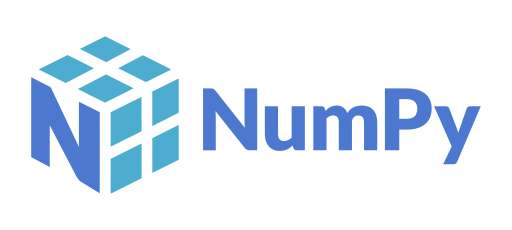

* Modul för hantering av numerisk data
* Första versionen kom 2005, och har därefter uppdaterats en rad gånger.
* Kan arbeta med vektorer, matriser och mer generellt med godtyckliga tensorer (t.ex 3-dimensionella listor)
* Beräkningar sker med hjälp av rutiner skrivna i C vilket gör det mycket snabbare än om vi gjort samma sak i Python
* Har massa inbyggda funktioner för matematiska operationer

https://numpy.org/doc/stable/user/index.html

Grundläggande datatyp i Numpy är `numpy.ndarray` som innehåller en n-dimensionell lista.

Skapas med hjälp av funktionen `numpy.array(indata)` där `indata` är en vanlig lista. 
<br><br>(Mer generellt kan `indata` vara vad som helst som "beter" sig som en lista)

In [177]:
# Importera numpy och namnge till np
import numpy as np

# Skapa en 1-dimensionell lista (vektor)
v = np.array([1, 2, 3])

# Skapa en 2-dimensionell lista (matris)
m = np.array(
    [
        [1, 0, 0], 
        [0, 1, 0], 
        [0, 0, 1]
    ])
m

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [178]:
type(m)

numpy.ndarray

In [179]:
v.shape

(3,)

In [180]:
m.shape

(3, 3)

In [182]:
# Multiplikation med ett tal sker elementvis
v = np.array([1, 2, 3])
2 * v

array([2, 4, 6])

In [186]:
#numpy har alla inbyggda matematiska operationer.

np.exp(v)

array([ 2.71828183,  7.3890561 , 20.08553692])

## Indexering och exempel

In [188]:
data = [
    ["Stockholm", 1584196],
    ["Göteborg", 592042],
    ["Malmö", 317245],
    ["Uppsala", 160926],
    ["Upplands Väsby och Sollentuna", 146102],
    ["Västerås", 126190],
    ["Örebro", 124027],
    ["Linköping", 113042],
    ["Helsingborg", 110520],
    ["Jönköping", 97996]
]
#Konvertera lista till en numpy array
data = np.array(data, dtype=object)

In [190]:
data.shape
# 10 rader, 2 kolumner

(10, 2)

In [192]:
# En rad (läs "första element i yttersta listan")
data[0]

array(['Stockholm', 1584196], dtype=object)

In [194]:
# Ett element (första raden, första kolumnen)
data[1, 1]
#data[0][0]

592042

In [ ]:
# Första kolumnen (jämför med listor från föreläsning 1)
data[0:2, 1]

In [195]:
data = [
    ["Stockholm", 1584196],
    ["Göteborg", 592042],
    ["Malmö", 317245],
    ["Uppsala", 160926],
    ["Upplands Väsby och Sollentuna", 146102],
    ["Västerås", 126190],
    ["Örebro", 124027],
    ["Linköping", 113042],
    ["Helsingborg", 110520],
    ["Jönköping", 97996]
]

data = np.array(data, dtype=object)

In [197]:
# Andra kolumnen
data[:, 1]

array([1584196, 592042, 317245, 160926, 146102, 126190, 124027, 113042,
       110520, 97996], dtype=object)

In [198]:
# Första kolumnen
data[:, 0]

array(['Stockholm', 'Göteborg', 'Malmö', 'Uppsala',
       'Upplands Väsby och Sollentuna', 'Västerås', 'Örebro', 'Linköping',
       'Helsingborg', 'Jönköping'], dtype=object)

## Indexering med villkor

In [199]:
tal = np.array(
    [
        [1, 2, 3], 
        [4, 5, 6]
    ])

In [201]:
tal > 4

array([[False, False, False],
       [False,  True,  True]])

In [202]:
tal[ tal > 4 ]

array([5, 6])

In [204]:
tal = np.array(
    [
        [1, 2, 3], 
        [4, 5, 6]
    ])

tal[:, 1] > 1

array([ True,  True])

Tillbaka till städer...

In [205]:
data = [
    ["Stockholm", 1584196],
    ["Göteborg", 592042],
    ["Malmö", 317245],
    ["Uppsala", 160926],
    ["Upplands Väsby och Sollentuna", 146102],
    ["Västerås", 126190],
    ["Örebro", 124027],
    ["Linköping", 113042],
    ["Helsingborg", 110520],
    ["Jönköping", 97996]
]

data = np.array(data, dtype=object)

In [207]:
# Vilka tätorter har mer än 150 000 invånare?
data[ data[:, 1] > 150000 ]

array([['Stockholm', 1584196],
       ['Göteborg', 592042],
       ['Malmö', 317245],
       ['Uppsala', 160926]], dtype=object)

In [209]:
# Hur många invånare har Örebro?
data[data[:, 0] == "Örebro"]

array([['Örebro', 124027]], dtype=object)

Vi kommer att använda `numpy`mycket i kursen och detta är bara en introduktion så se gärna dokumentationen: https://numpy.org/doc/stable/user/index.html

## Kort om att rita figurer (plotting)

I Python finns det flera moduler för att visulisera data. Den allra vanligaste modulen heter **matplotlib** och är väldigt intuitiv att lära sig. För den intresserade finns även modulerna **seaborn** och **plotly**.

![Matplotlib logo](../images/matplotlib-logo.png)

In [221]:
#Importera modulen
import matplotlib.pyplot as plt

#Definera lite data.
x = [1, 2, 3, 4, 5, 6]
y = [xi**2 for xi in x]

#Plot över y=x^2. #ls, lw
plt.figure(figsize=(8,6))
plt.plot(x, y, lw=3)
plt.plot(x, y, 'ro') #Punkter istället för linje där vi har observationer, r=röd


TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

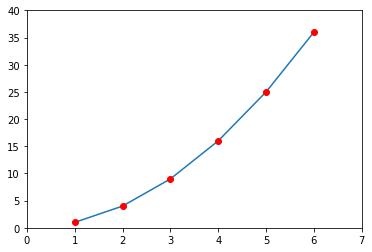

In [222]:
#Kan formatera figuren  
plt.plot(x, y) #Som ovan
plt.plot(x, y, 'ro') #Punkter istället för linje där vi har observationer, r=röd
plt.axis([0, 7, 0, 40]) #Vilket intervall vi vill att figuren ska visa
plt.show() #Visa figur


### Formatera ytterligare genom att lägga till namn på axlarna och titel

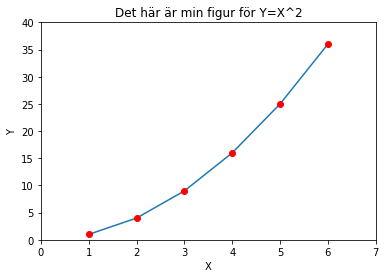

In [224]:
#Lägga till namn på axlar och figur-titel
plt.plot(x, y)
plt.plot(x, y, 'ro')
plt.axis([0, 7, 0, 40])
plt.title('Det här är min figur för Y=X^2') #Titel
plt.xlabel('X') #Namn på X-axeln
plt.ylabel('Y') #Namn på Y-axeln
plt.show()

### Formatera ytterligare genom att lägga till namn på plot objekten via plt.legend()

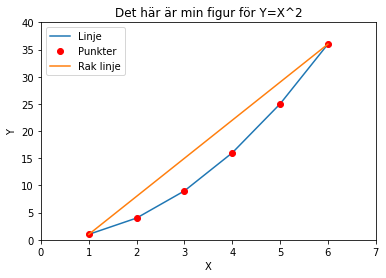

In [226]:
#Lägga till legend för att visa namn på de olika plot-objekten.
plt.plot(x, y, label = 'Linje')
plt.plot(x, y, 'ro', label = 'Punkter')
plt.plot(x, np.arange(1, 40, 7), label = 'Rak linje') #Addera label för att ge namn åt plot objektet
plt.axis([0, 7, 0, 40])
plt.legend() #Lägg till en legend
plt.title('Det här är min figur för Y=X^2')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Exempel, simulera "teoretisk" IQ-fördelning
Vi vill nu visualisera hur en teoretisk IQ-fördelning kan se ut.

In [227]:
#Bestäm medelvärde och standardavvikelse
medelvärde, standardavvikelse = 100, 15
#Medelvärde + standardavikelse * slumpmässiga tal från standard normalfördelning(se numpy.random.randn())
x = medelvärde + standardavvikelse * np.random.randn(5000)

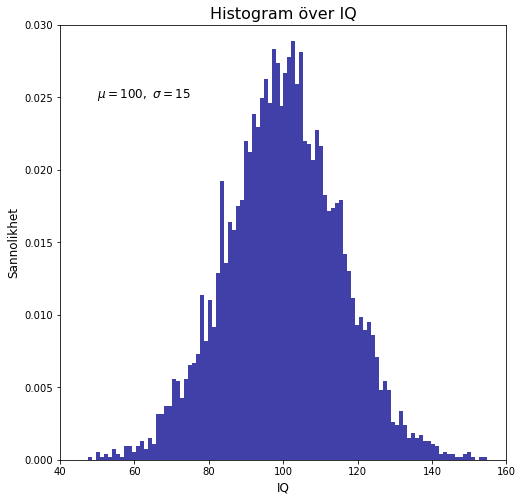

In [230]:
#Vi gör ett histogram över datan
plt.figure(figsize = (8,8))
plt.hist(x, bins=100, density=True, facecolor='darkblue', alpha=0.75) #Histogram via plt.hist()
plt.xlabel('IQ', fontsize = 12)
plt.ylabel('Sannolikhet', fontsize = 12)
plt.title('Histogram över IQ', fontsize = 16)
plt.text(50, .025, r'$\mu=100,\ \sigma=15$', fontsize = 12) #Lägga till text i figur, och dess placering.
plt.axis([40, 160, 0, 0.03])
plt.show()

### Vi kan göra det ännu snyggare...

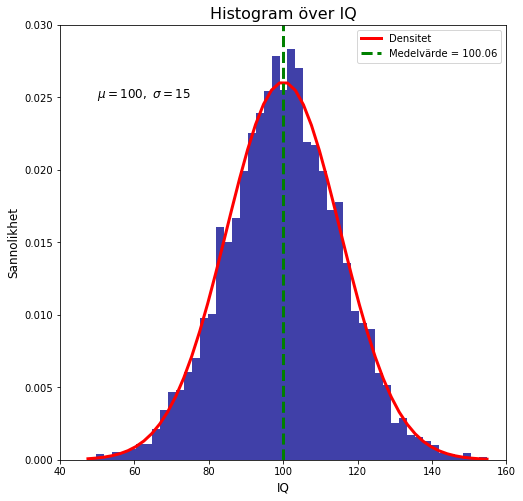

In [232]:
# Skapa ett histogram
plt.figure(figsize=(8, 8))
n, bins, patches = plt.hist(x, 50, density=True, facecolor='darkblue', alpha=0.75)

# Rita en densitetslinje
densitet = 1 / (np.std(x) * np.sqrt(2 * np.pi)) * np.exp(-(bins - np.mean(x))**2 / (2 * np.var(x)))
plt.plot(bins, densitet, color='red', linewidth=3, label='Densitet')

# Beräkna och markera medelvärdet
medelvärde = np.mean(x)
plt.axvline(medelvärde, color='green', linestyle='dashed', linewidth=3, label=f'Medelvärde = {medelvärde:.2f}')

# Beskrivning och titel
plt.xlabel('IQ', fontsize=12)
plt.ylabel('Sannolikhet', fontsize=12)
plt.title('Histogram över IQ', fontsize=16)
plt.text(50, .025, r'$\mu=100,\ \sigma=15$', fontsize = 12)
plt.axis([40, 160, 0, 0.03])
plt.legend()# Lägg till en legend
plt.show()# Visa plotten

### Finns väldigt många alternativ för att skräddarsy sina figurer. 

För mer information läs vidare på **https://matplotlib.org/**

### Låt oss nu gå igenom Laboration1 och några exempeldataset.

* Exempeldataset 1 - Data från valdeltagande och Resultat från SCB.
* Exempeldataset 2 - Data från Department of Agriculture i USA (USDA) över matkostnader för olika matkategorier.
* Laboration 1 - Jobba med data väderdata från smhi.